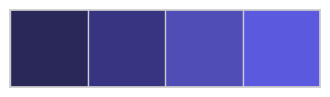

In [1]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import date, datetime # for manupulating time and date columns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns

# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

# set the color palette
palette = sns.color_palette(["#292859",'#373482','#504DB6','#5B59DD'])
sns.palplot(palette) # print color palette

In [2]:
df = pd.read_csv('Customer personality Analysis (3).csv')

In [3]:
df.shape

(2240, 29)

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [5]:
df.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

In [10]:
# converting columns to DateTime format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [11]:
# Check the skewness before imputation of numeric cols
df['Income'].skew()

6.763487372811116

In [12]:
# Replacing null values with median cause the data is skewed which means there are outliers in the data
df['Income'].fillna(df['Income'].median(), inplace = True)

In [13]:
# check the unique values
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [14]:
# check the unique values
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [15]:
# findout the first and last date in dataset
df["Dt_Customer"].dt.year.min() , df["Dt_Customer"].dt.year.max()

(2012, 2014)

In [16]:
# Creating Age and Years_Customer ( Amount of years a personn has been customer) columns.
df['Age'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)
df['Years_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Dt_Customer'].dt.year)
df['Days_Customer'] = (df["Dt_Customer"].max()) - (df['Dt_Customer'])

# Total amount spent on products
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']

# Total number of purchases made
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Total number of accepted campaigns
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

# adding columns about the day, month and year cutomer joined
df['Year_Joined'] = df['Dt_Customer'].dt.year
df['Month_Joined'] = df['Dt_Customer'].dt.strftime("%B")
df['Day_Joined'] = df['Dt_Customer'].dt.day_name()

# dividing age into groups
df['Age_Group'] = pd.cut(x = df['Age'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middel Aged','Senior Citizen'])
# Total children living in the household
df["Children"] = df["Kidhome"] +  df["Teenhome"]

#Deriving living situation by marital status
df["Partner"]=df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

#Segmenting education levels in three groups
df["Education_Level"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [17]:
# Dropping useless columns
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [18]:
# Converting Days_Joined to int format
df['Days_Customer'] = df['Days_Customer'].dt.days.astype('int16')

In [19]:
print(df.shape)
df.sample(5)

(2240, 37)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level
463,Graduation,Married,80124.0,0,0,47,483,84,398,205,84,241,1,3,7,8,1,1,0,0,0,0,0,0,51,0,163,1495,19,1,2014,June,Thursday,Middel Aged,0,Yes,Graduate
1524,Graduation,Single,3502.0,1,0,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,0,41,1,602,5,0,0,2013,April,Saturday,Adult,1,No,Graduate
1829,Master,Together,22669.0,1,0,30,16,14,36,37,22,48,3,4,1,2,9,0,0,0,0,0,0,1,39,1,563,173,10,1,2013,May,Wednesday,Adult,1,Yes,Postgraduate
1451,Graduation,Married,77343.0,0,0,28,227,151,573,98,54,31,1,3,4,9,1,0,0,0,0,0,0,0,49,0,91,1134,17,0,2014,September,Saturday,Middel Aged,0,Yes,Graduate
1987,Graduation,Married,51373.0,0,0,37,83,2,101,64,26,117,1,3,5,3,4,0,0,0,0,0,0,0,23,1,532,393,12,0,2013,June,Saturday,Young adult,0,Yes,Graduate


In [20]:
df1 = df.copy() # make a copy
df1.drop(['Education','Marital_Status','Years_Customer','Year_Joined','Month_Joined','Day_Joined'], axis=1, inplace=True)

In [21]:
num_col = df1.select_dtypes(include = np.number).columns

In [22]:
for col in num_col:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df1[col].index:
        if df1.loc[ind,col]>ul:
            df1.loc[ind,col]=ul
        elif df1.loc[ind,col]<ll:
            df1.loc[ind,col]=ll
        else:
            pass
print("Outliers have been taken care of")

Outliers have been taken care of


# FEATURE TRANSFORMATION

In [23]:
# selecting the cols to use
subset = df1[['Income','Kidhome','Teenhome','Age','Partner','Education_Level']]
print('This is the data we will use for clustering:')
subset.head()

This is the data we will use for clustering:


,Income,Kidhome,Teenhome,Age,Partner,Education_Level
0,58138.0,0,0,57,No,Graduate
1,46344.0,1,1,60,No,Graduate
2,71613.0,0,0,49,Yes,Graduate
3,26646.0,1,0,30,Yes,Graduate
4,58293.0,1,0,33,Yes,Postgraduate


In [24]:
# examin the min, max and mean of your columns
subset.describe()

,Income,Kidhome,Teenhome,Age
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,51865.874554,0.444196,0.506250,45.147768
std,20936.104821,0.538398,0.544538,11.771725
min,1730.000000,0.000000,0.000000,18.000000
25%,35538.750000,0.000000,0.000000,37.000000
50%,51381.500000,0.000000,0.000000,44.000000
75%,68289.750000,1.000000,1.000000,55.000000
max,117416.250000,2.000000,2.000000,82.000000


In [25]:
# Importing essential libraries for bulding pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [26]:
# I am not scaling the kidhome, teenhome cols, cause thire min, max lies between 0 & 2
num_cols = ['Income','Age']
numeric_pipeline = make_pipeline(StandardScaler())

In [27]:
ord_cols = ['Education_Level']
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']]))

In [28]:
nom_cols = ['Partner']
nominal_pipeline = make_pipeline(OneHotEncoder())

In [29]:
# stack your pipelines in column transformer
transformer = ColumnTransformer(transformers=[('num',numeric_pipeline,num_cols),
                                           ('ordinal', ordinal_pipeline,ord_cols),
                                              ('nominal' ,nominal_pipeline,nom_cols)
                                             ])

In [30]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Income', 'Age']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Undergraduate',
                                                                              'Graduate',
                                                                              'Postgraduate']]))]),
                                 ['Education_Level']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Partner'])])

In [31]:
# Now lets fit and transform the data
transformed = transformer.fit_transform(subset)
print('Data has been Transformed')

Data has been Transformed


# K-MEANS CLUSTERING & CLUSTER's ANALYSIS

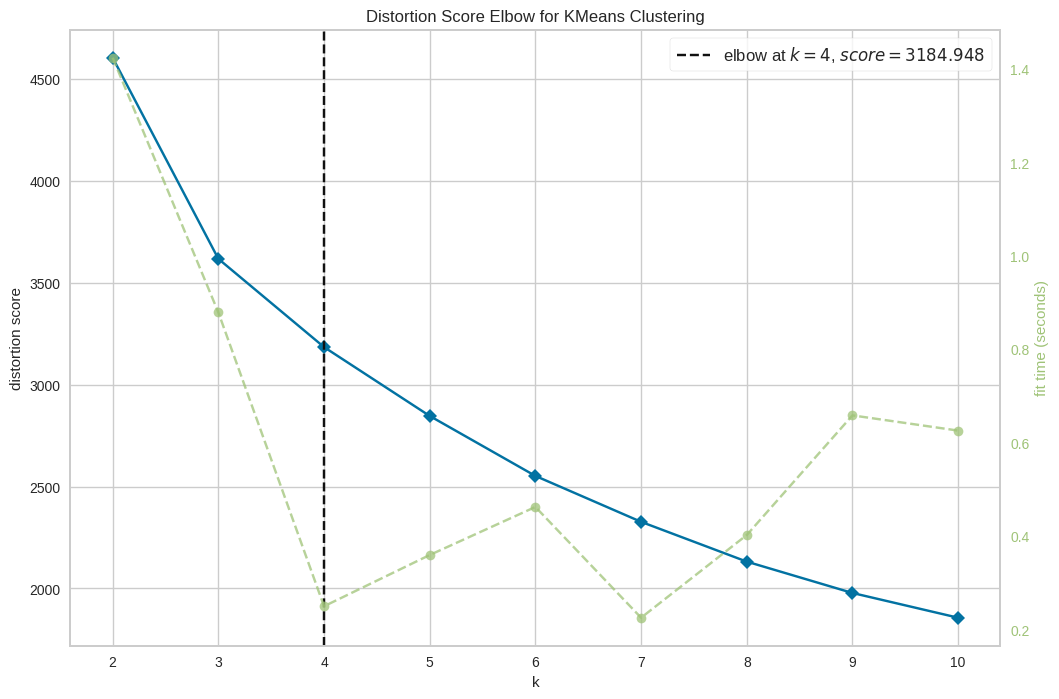

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(transformed)
elbow_graph.show()

From above it is clear that k=4

In [33]:
# using k-means to form clusters
kmeans = KMeans(n_clusters=4, random_state=42)
subset['Clusters'] = kmeans.fit_predict(transformed) #fit the data and adding back clusters to the data in clusters column

In [34]:
subset.head()

,Income,Kidhome,Teenhome,Age,Partner,Education_Level,Clusters
0,58138.0,0,0,57,No,Graduate,2
1,46344.0,1,1,60,No,Graduate,2
2,71613.0,0,0,49,Yes,Graduate,1
3,26646.0,1,0,30,Yes,Graduate,0
4,58293.0,1,0,33,Yes,Postgraduate,1


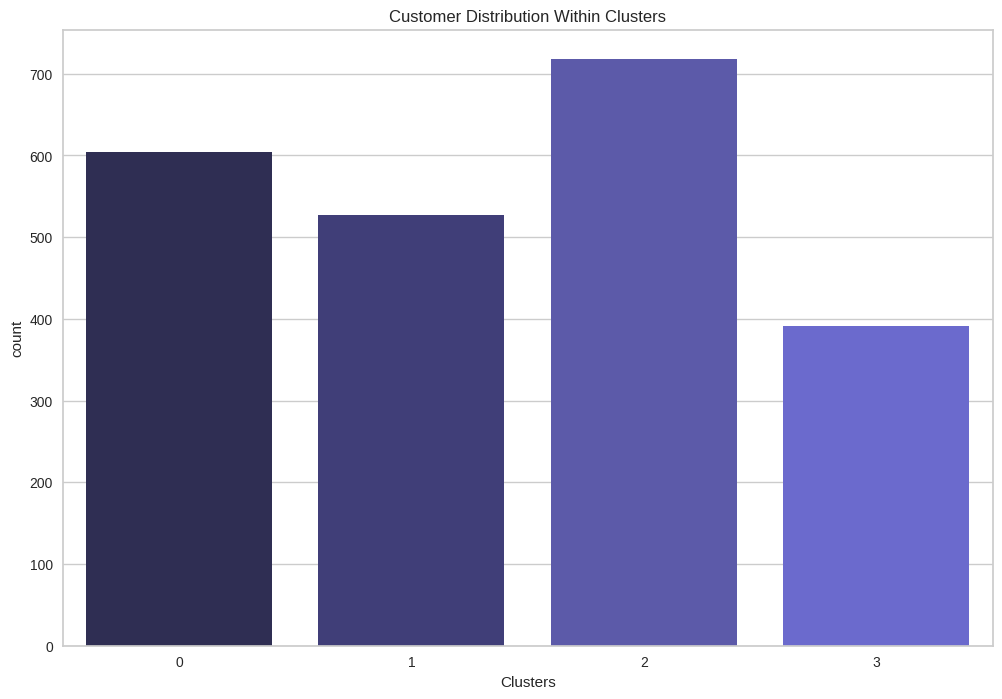

In [35]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=subset, palette=palette)
plt.title('Customer Distribution Within Clusters')
plt.show()

Observations 👀
1. Cluster 2 has highest number of customers
2. Cluster 3 has least number of customers

Lets find out what number of customers in each cluster have how many Kids or Teens in household, how many of them have partner and their education level

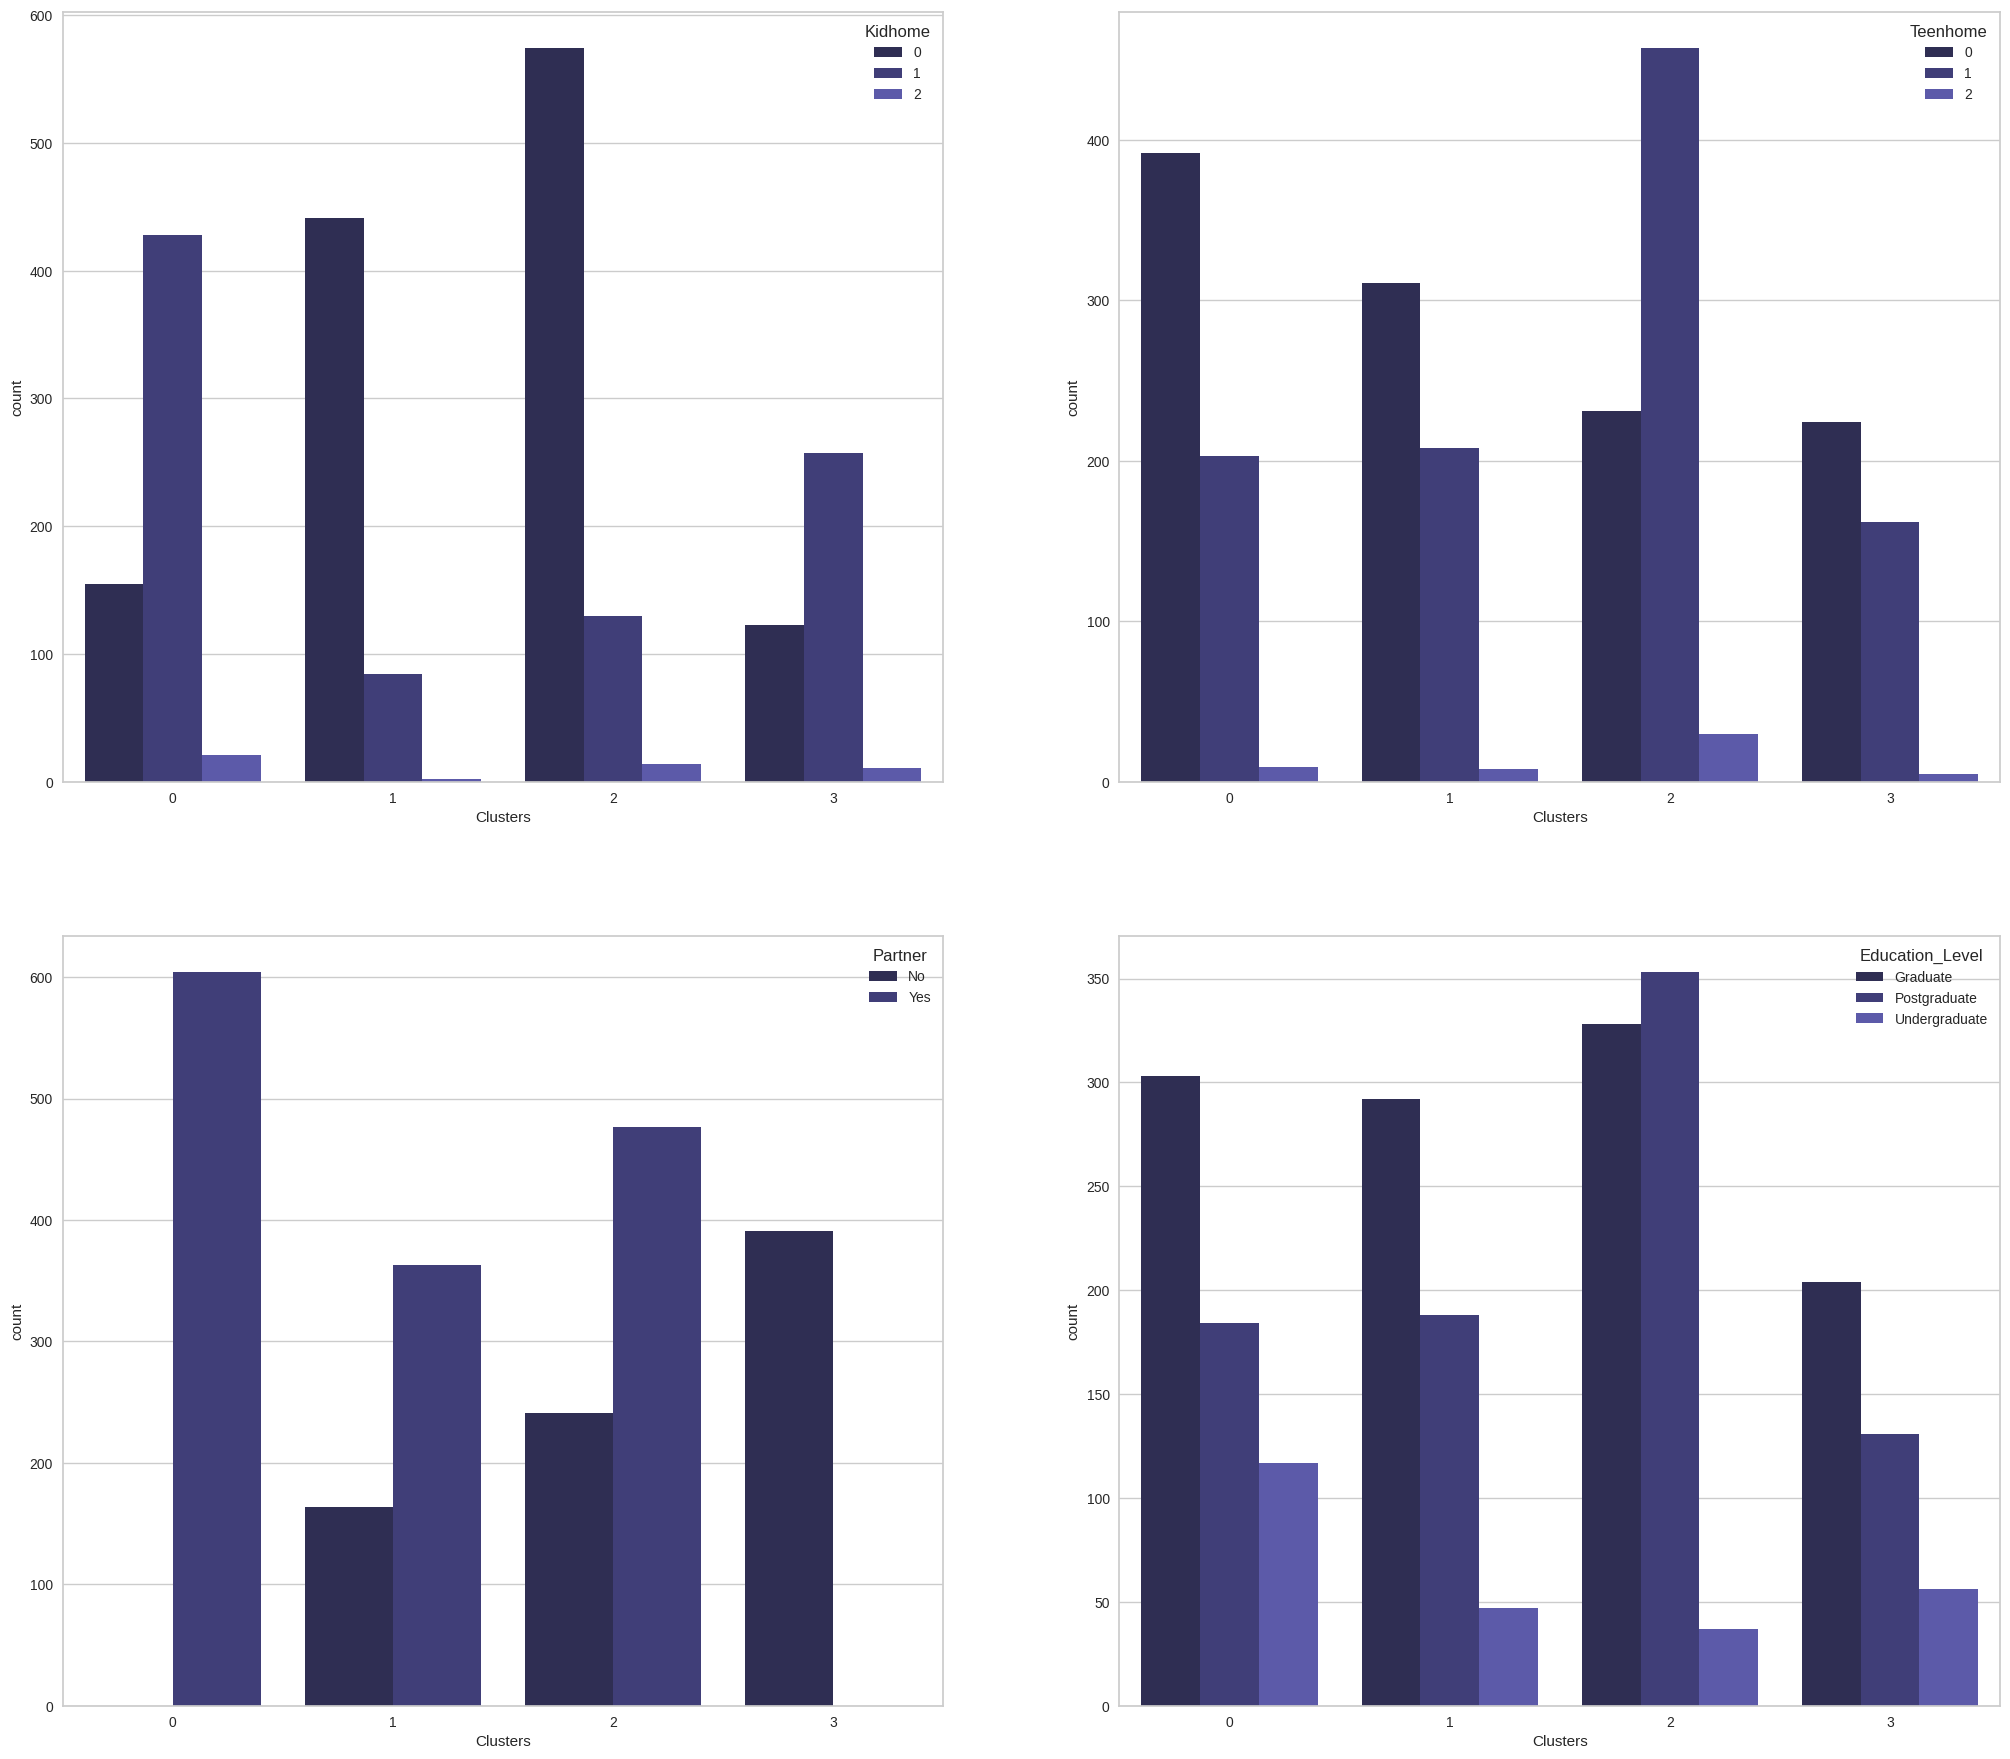

In [36]:
# create list of categories
count_cols= ['Kidhome','Teenhome','Partner','Education_Level']

_, ax1 = plt.subplots(2,2, figsize=(25,22))

for i, col in enumerate(count_cols):
    sns.countplot(x='Clusters', data=subset, ax=ax1[i//2, i%2],hue=col,palette=palette)
    
plt.show()

Observations 👀
**Kidhome:** * Cluster 0 mostly has customers with 1 kid in household * Cluster 1 has customers with no kids in household * Cluster 2 also has large number of customers with no kids in household * Cluster 3 has customers with 0 and 1 kids in household **Teenhome:** * Cluster 0 consist of customers with no teen in household & few of them have 1 Teen in household * Same goes for the cluster 1 & 3 * Cluster 2 has customers with 1 Teen in household **Partner:** * All the customers in cluster 0 have partner * All The customers in cluster 3 have no partner * Cluster 1 & 2 has customers with and without partner, but most of them have partner **Education_Level:** * All clusters have customers with graduate, postgraduate and undergraduate background * All clusters have less number of customers with undergraduate background * Cluter 2 has highest number of postgraduates and graduates

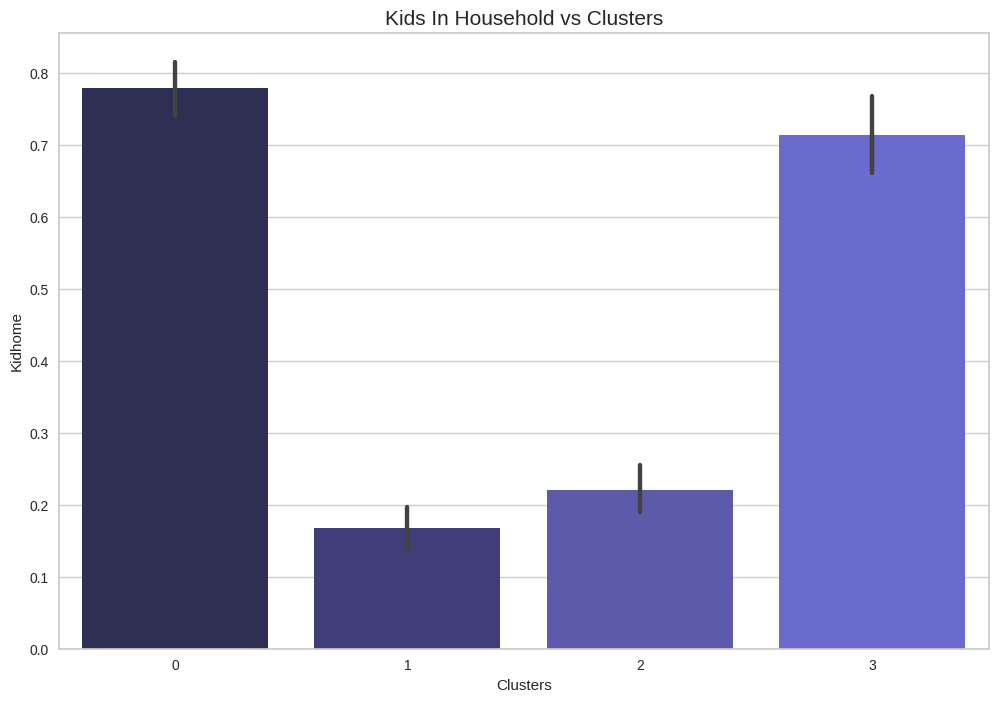

In [37]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Kidhome"],palette=palette)
plt.title("Kids In Household vs Clusters", size=15)
plt.show()

Observation:

Cluster 0 and 3 has the maximum number of customers with kids in household
Cluster 1 and 2 has the least number of customers with kids in household

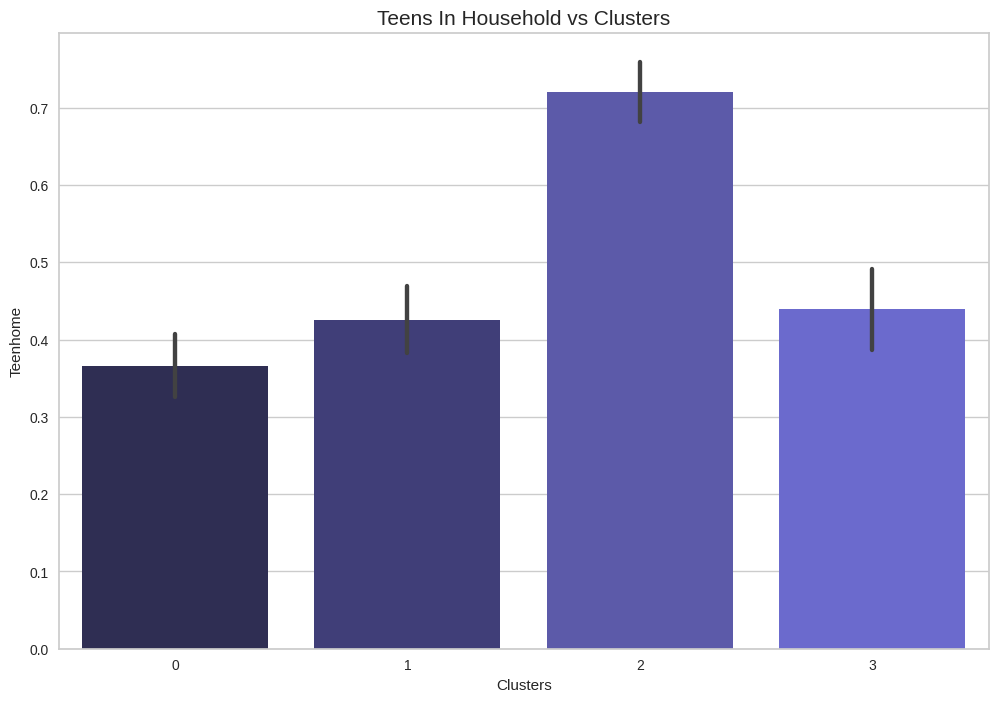

In [38]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Teenhome"],palette=palette)
plt.title("Teens In Household vs Clusters", size=15)
plt.show()

Observations 👀
1. Cluster 2 has maximum number of customers having Teens in household
2. Remaining Clusters also have customers with Teens in household but they are less as compared to cluster 2

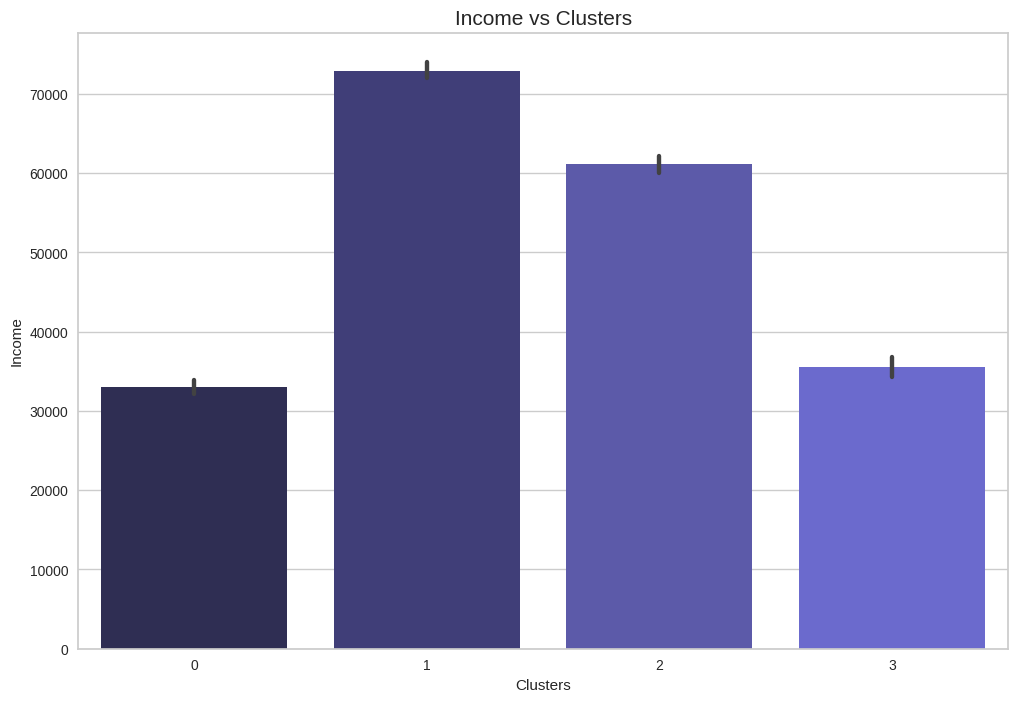

In [39]:
# Lets findout income of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Income"],palette=palette)
plt.title("Income vs Clusters", size=15)
plt.show()

Observations 👀
1. Cluster 1 has high Income followed by cluster 2. Which is little strange cause cluster 2 has highest number of customers and most number of post graduates & graduates as compared to cluster 1
2. Cluster 0 and 3 has least income

Following graphs shows what are the contributing factors in income

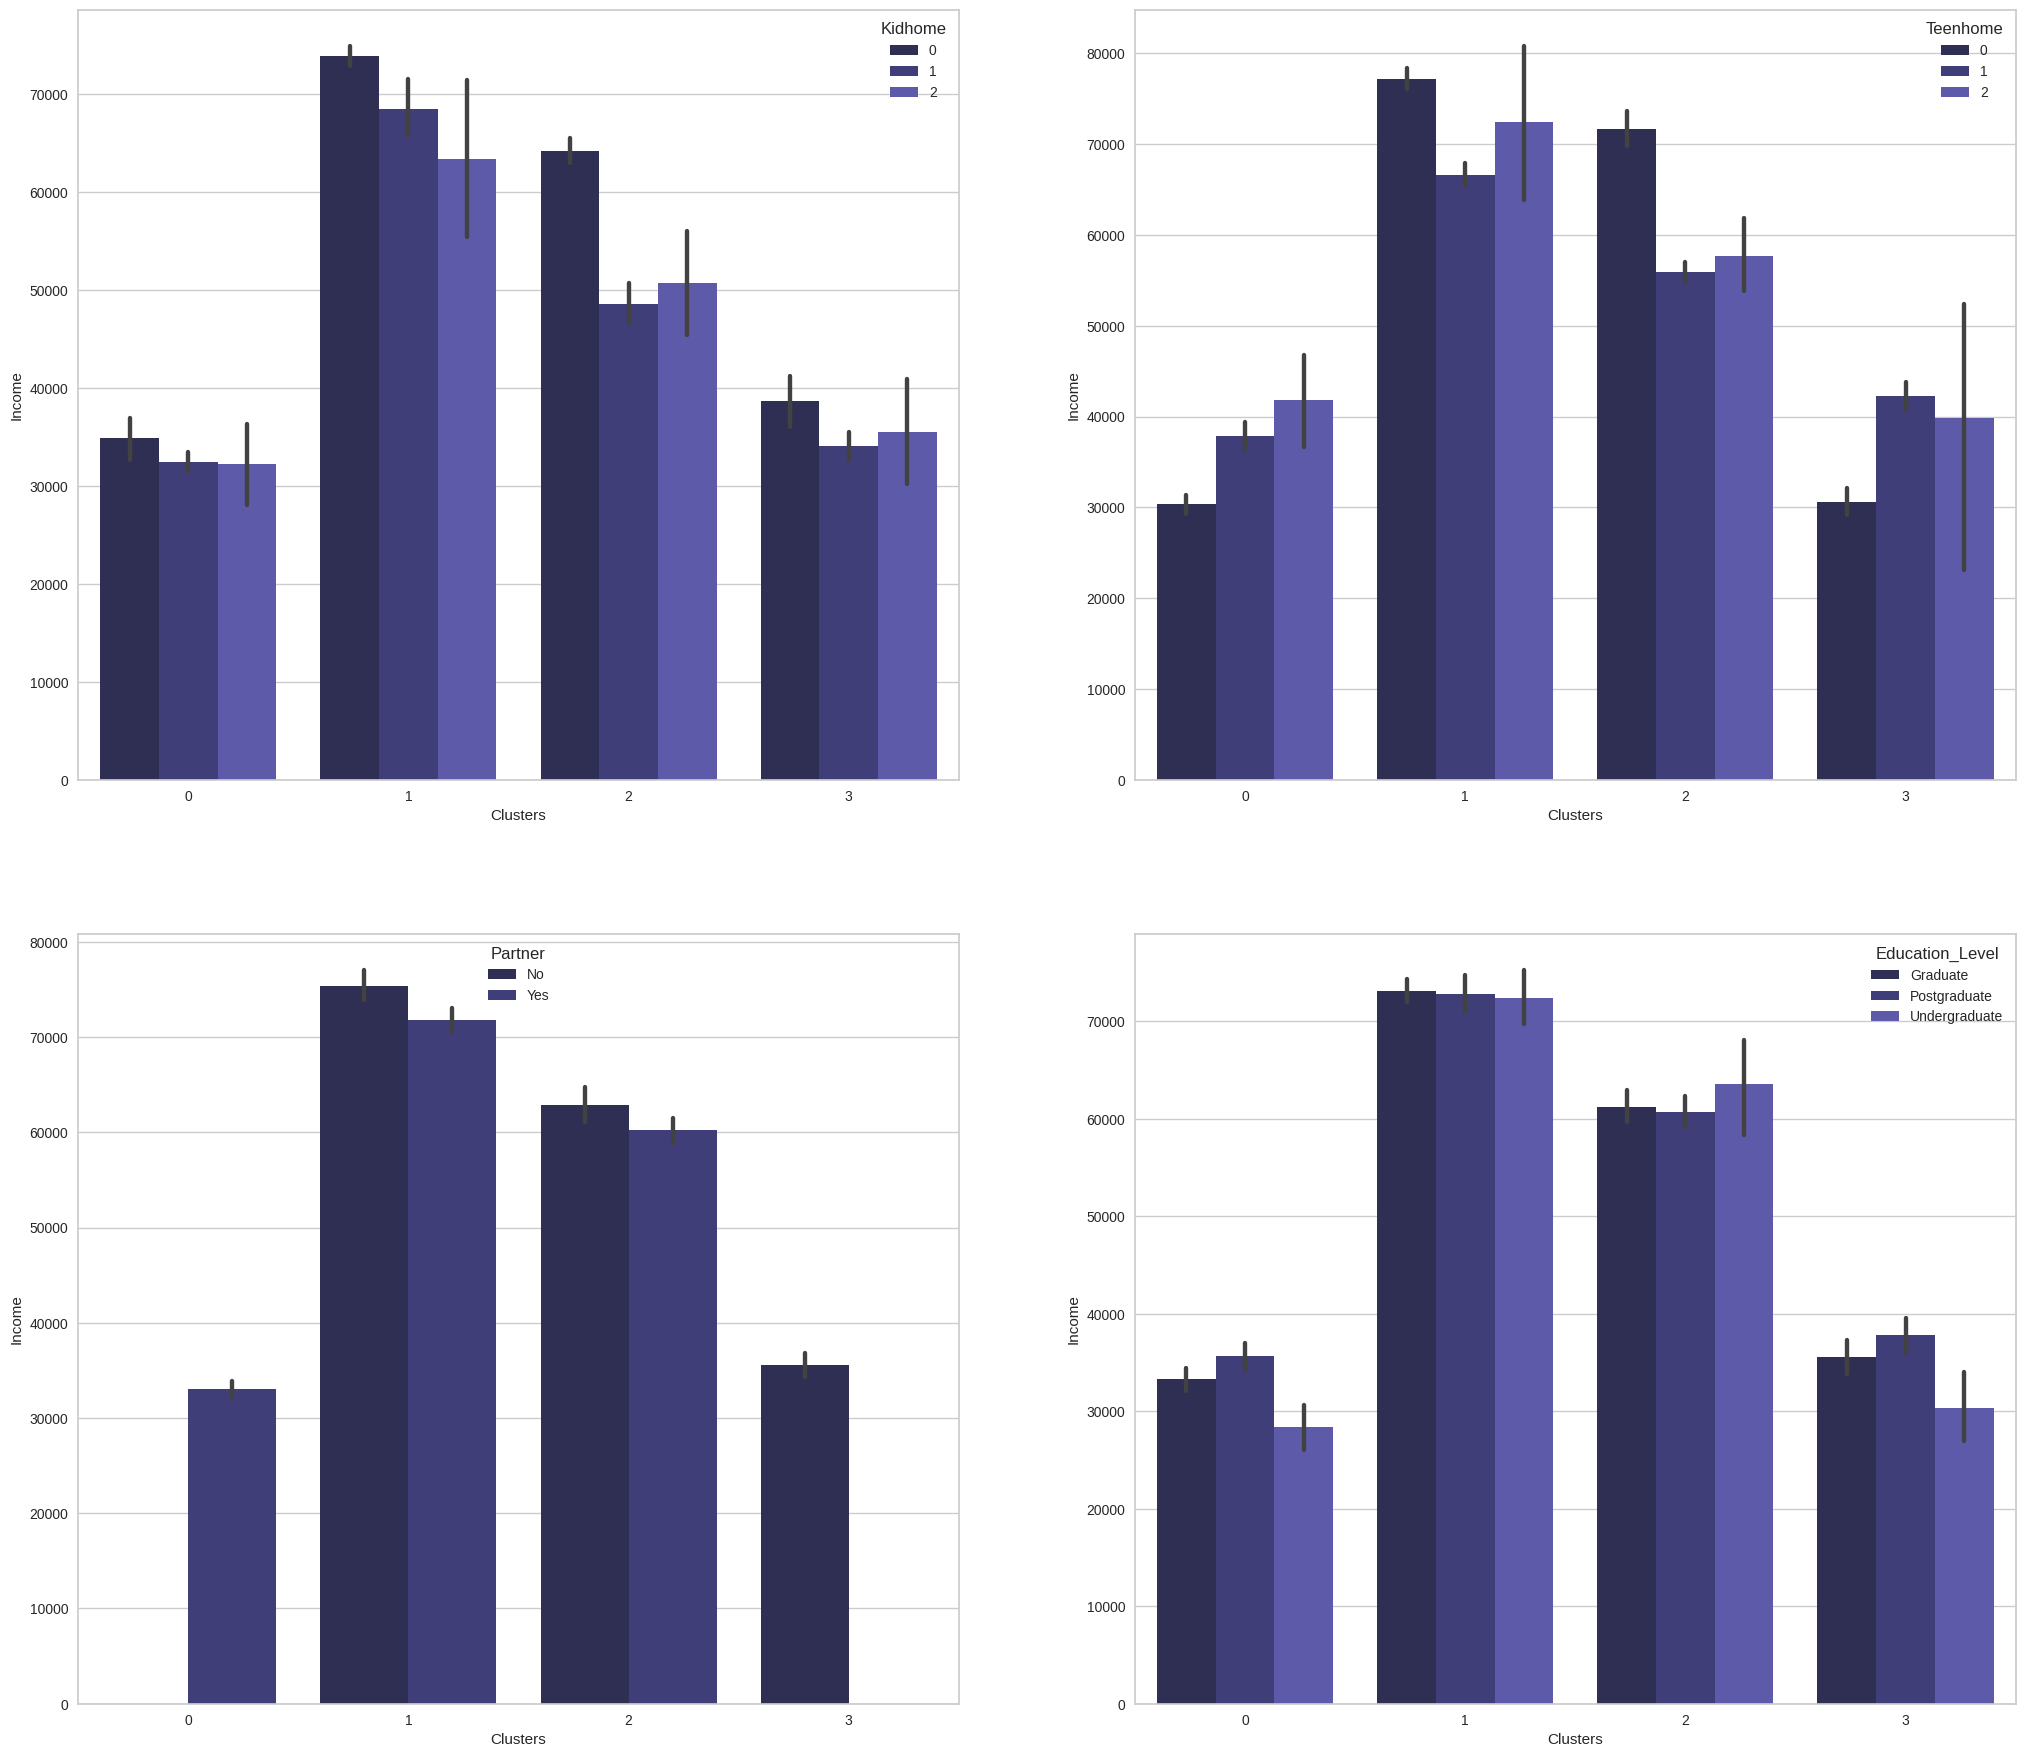

In [40]:
catcols= ['Kidhome','Teenhome','Partner','Education_Level']

_, ax1 = plt.subplots(2,2, figsize=(25,22))

for i, col in enumerate(catcols):
    sns.barplot(x='Clusters', y='Income', data=subset, ax=ax1[i//2, i%2],hue=col,palette=palette)
    
plt.show()

Observations 👀
1. Very interesting thing i can see from first 2 plots is, We saw before the number of customers with 2 kids or teens is very very less still their income is similar to the customers which have no kids or teens or have 1 kid & teen. So I conclude that the customers with more than 1 kid or teen in houehold has high household income 1
2. From last 2 plots i think education_level and partner has nothing to do with income. Infact undergraduates are earniing equal or more than graduates and postgraduates within each cluster.

# CUSTOMER PROFILING

CLUSTER 1
1.fewer customers but with highest income
2.no kids,few have 1 teen
3.graduates and postgraduates
4.most of them have a partner
CLUSTER 0
1.least income
2.1 kid and few have 1 teen also
3.graduates and post graduates but also has most undergraduates than any cluster
4.all have partner
CLUSTER 2
1.max number of customers have high income
2.no kids,few have 1 or 2 teen
3.high number of postgraduates and graduates
4.most of them have partner
CLUSTER 3
1.fewer customers have less income
2.1 kid and few have 1 teen also
3.graduates and postgraduates
4.all have no patrner


# MODEL BUILDING

Now lets build a multi classification model that will predict the cluster for given input of perticular customer

1.import required libraries
2.seperate features and target column (Clusters)
3.create train and test split
4.just add gradient boosting classifier to existing transformer pipline
5.fit data to the new pipline


In [41]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
# separate features and target column
x = subset.drop('Clusters', axis=1)
y = subset['Clusters']

In [43]:
# create train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [44]:
# adding GradientBoostingClassifier to transformer pipeline
final_pipeline = make_pipeline(transformer, GradientBoostingClassifier())

In [45]:
# fit the data to new pipeline & model
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

Above is the diagram with all the steps in our pipeline

In [46]:
# check the accuracy of our model
final_pipeline.score(x_test, y_test)

0.9702380952380952

You can export this pipeline with all the transformation and trained model

In [47]:
import pickle

In [48]:
filename = 'classifier.pkl' # create a variable with name you wanna give to the file
pickle.dump(final_pipeline, open(filename,'wb')) 

In [50]:
%%writefile customer_segmentation_app.py 


# importing necessary libraries
import pickle
import streamlit as st
import pandas as pd
import numpy as np
data = pd.read_pickle('classifier.pkl')

#load the model
classifier = pickle.load(open('data','rb'))


#page configuration
st.set_page_config(page_title = 'Customer Segmentation Web App', layout='centered')
st.title('Customer Segmentation Web App')

# customer segmentation function
def segment_customers(input_data):
    
    prediction=classifier.predict(pd.DataFrame(input_data, columns=['Income','Kidhome','Teenhome','Age','Partner','Education_Level']))
    print(prediction)
    pred_1 = 0
    if prediction == 0:
            pred_1 = 'cluster 0'

    elif prediction == 1:
            pred_1 = 'cluster 1'

    elif prediction == 2:
            pred_1 = 'cluster 2'

    elif prediction == 3:
            pred_1 = 'cluster 3'

    return pred_1

def main():
    
    Income = st.text_input("Type In The Household Income")
    Kidhome = st.radio ( "Select Number Of Kids In Household", ('0', '1','2') )
    Teenhome = st.radio ( "Select Number Of Teens In Household", ('0', '1','2') )
    Age = st.slider ( "Select Age", 18, 85 )
    Partner = st.radio ( "Livig With Partner?", ('Yes', 'No') )
    Education_Level = st.radio ( "Select Education", ("Undergraduate", "Graduate", "Postgraduate") )
    
    result = ""

    # when 'Predict' is clicked, make the prediction and store it
    if st.button("Segment Customer"):
        result=segment_customers([[Income,Kidhome,Teenhome,Age,Partner,Education_Level]])
    
    st.success(result)
    

if __name__ == '__main__':
        main ()

Overwriting customer_segmentation_app.py
